# 常见的用法

In [1]:
import numpy as np
import pandas
import sklearn
from sklearn.datasets import load_boston,load_iris
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X,y=load_iris(return_X_y=True)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# 预处理

In [2]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

X,y=load_iris(return_X_y=True)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print('不处理')
print(knn.score(x_test,y_test))

#标准化
# X,y=load_iris(return_X_y=True)
X=preprocessing.StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print('标准化')
print(knn.score(x_test,y_test))

#归一化 缩放到一个范围内
# X,y=load_iris(return_X_y=True)
X=preprocessing.MinMaxScaler().fit_transform(X)
# X=preprocessing.minmax_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print('归一化')
print(knn.score(x_test,y_test))

#处理异常值
# X,y=load_iris(return_X_y=True)
X=preprocessing.RobustScaler().fit_transform(X)
# X=preprocessing.minmax_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
print('处理异常值')
knn=KNeighborsClassifier().fit(x_train,y_train)
print(knn.score(x_test,y_test))

# 稀疏矩阵的处理，有很多缺失值，缩放到[-1,1]
X,y=load_iris(return_X_y=True)
X=preprocessing.maxabs_scale(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
knn=KNeighborsClassifier().fit(x_train,y_train)
print('稀疏矩阵的处理')
print(knn.score(x_test,y_test))

不处理
0.85
标准化
0.9
归一化
0.95
处理异常值
0.85
稀疏矩阵的处理
0.95


In [3]:
# 缺失值的库
from sklearn.impute import SimpleImputer
X=SimpleImputer(strategy='mean').fit_transform(X)
# missing_values 把什么看做缺失值 
# strategy='mean' 平均值,strategy='median' 中位数,strategy='most_frequent' 众数
#,strategy='constant' 常数，如果是是常数那么fill_value=None要确定一个值

In [4]:
y_true=y_test
y_pred=knn.predict(x_test)

In [5]:
# 准确率

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
# y_pred = [0, 2, 1, 3,9,9,8,5,8]
# y_true = [0, 1, 2, 3,2,6,3,5,9]

print(accuracy_score(y_true, y_pred))


print(accuracy_score(y_true, y_pred, normalize=False))  # 类似海明距离，每个类别求准确后，再求微平均



0.95
19


In [7]:
#进去
from sklearn import metrics
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率


print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率

print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率



0.95
0.9444444444444445
0.9444444444444445


In [8]:
#召回率
print(metrics.recall_score(y_true, y_pred, average='micro'))
print(metrics.recall_score(y_true, y_pred, average='macro'))

0.95
0.9629629629629629


In [9]:
# F1
metrics.f1_score(y_true, y_pred, average='weighted')  

0.9508021390374332

In [10]:
# 混淆矩阵 的作用
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[6, 0, 0],
       [0, 5, 0],
       [0, 1, 8]], dtype=int64)

In [11]:
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 2, 0]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      1.00      1.00         2

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
# kappa score
#kappa score是一个介于(-1, 1)之间的数. score>0.8意味着好的分类；0或更低意味着不好（实际是随机标签）
from sklearn.metrics import cohen_kappa_score
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred)
# print(y_pred)
# print(y_true)

0.6666666666666667

In [13]:
# 计算ROC值
# 了解一下这个是做啥子的
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

In [14]:
# ROC曲线
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr,tpr,thresholds = roc_curve(y, scores, pos_label=2)
print(roc_curve(y, scores, pos_label=2))
# 这个怎么绘制呢
plt.show(roc_curve(y, scores, pos_label=2))

(array([0. , 0. , 0.5, 0.5, 1. ]), array([0. , 0.5, 0.5, 1. , 1. ]), array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))


In [15]:
# 海明距离
from sklearn.metrics import hamming_loss
# y_pred = [1, 2, 3, 4]
# y_true = [2, 2, 3, 4]
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 2, 0]
# print(y_true)
# print(y_pred)
hamming_loss(y_true, y_pred)

0.2

In [16]:
# Jaccard距离
import numpy as np
from sklearn.metrics import jaccard_similarity_score
# y_pred = [0, 2, 1, 3,4]
# y_true = [0, 1, 2, 3,4]
print(jaccard_similarity_score(y_true, y_pred))
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

0.8
4


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# 分类

## KNN

准确率
0.95
微平均精确率
0.95
宏平均精确率
0.9444444444444445
指定特定分类标签的精确率
0.9444444444444445
微平均召回率
0.95
宏平均召回率
0.9629629629629629
F1
0.9508021390374332
confusion_matrix
[[6 0 0]
 [0 5 0]
 [0 1 8]]
分类报告
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         6
     class 1       0.83      1.00      0.91         5
     class 2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

kappa score
海明距离
0.05
Jaccard距离
0.95
Jaccard距离正则化
19
交叉验证KNN


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


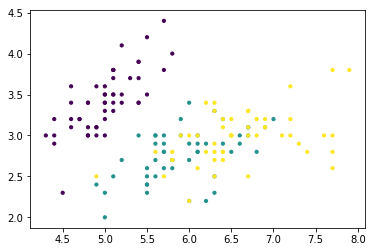

0.9733333333333334


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

#训练
knn.fit(x_train,y_train)
#测试 预测结果
knn.predict(x_test)
acc=knn.score(x_test,y_test)
# print(acc)
y_true=y_test
y_pred=knn.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

X,y=load_iris(return_X_y=True)
print('交叉验证KNN')
plt.scatter(X[:,0],X[:,1],s=10,c=y)
plt.show()
print(cross_val_score(knn,X,y,cv=5,scoring='accuracy').mean())

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC  #这里有参数好棒
import numpy as np
import time
print(__doc__)
start = time.clock()

# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target  #这里读取数据即可

# #读取数据集

X,y=load_iris(return_X_y=True)

# # Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# list=np.linspace(1,200,200);
# tuned_parameters = [ { 'n_neighbors': [2,4,8,16,32,64],
#                       'p': [2,3,4,5,6,7,8],
#                     }
#                    ]

# 这个可以研究一下子
# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])
tuned_parameters=dict(n_neighbors=[2,4,8,16,32,64]
                      ,p=[2,3,4,5,6,7,8])

knn=KNeighborsClassifier(n_neighbors=2,p=4)

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
elapsed = (time.clock() - start)
print("Time used:",elapsed)

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set

Best parameters set found on development set:

{'n_neighbors': 4, 'p': 3}

Grid scores on development set:

0.970 (+/-0.050) for {'n_neighbors': 2, 'p': 2}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 3}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 4}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 5}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 6}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 7}
0.979 (+/-0.051) for {'n_neighbors': 2, 'p': 8}
0.989 (+/-0.044) for {'n_neighbors': 4, 'p': 2}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 3}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 4}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 5}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 6}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 7}
1.000 (+/-0.000) for {'n_neighbors': 4, 'p': 8}
0.990 (+/-0.038) for {'n_neighbors': 8, 'p': 2}
0.990 (+/-0.038) for {'n_neighbors': 8, 'p': 3}
0.979 (+/-0.051) for {'n_neighbors': 8, 'p': 4}
0.990 (+/-0.038) for {'n_neighbors': 8, 'p': 5}
0.990 (+/-0.038) for {'n_nei

## svm

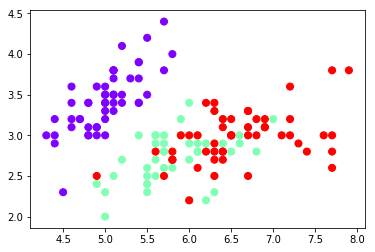

交叉验证LinearSVC
0.9666666666666668
0.9800000000000001
准确率
0.95
微平均精确率
0.95
宏平均精确率
0.9444444444444445
指定特定分类标签的精确率
0.9444444444444445
微平均召回率
0.95
宏平均召回率
0.9629629629629629
F1
0.9508021390374332
confusion_matrix
[[6 0 0]
 [0 5 0]
 [0 1 8]]
分类报告
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         6
     class 1       0.83      1.00      0.91         5
     class 2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

kappa score
海明距离
0.05
Jaccard距离
0.95
Jaccard距离正则化
19
交叉验证SVC


C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\sv

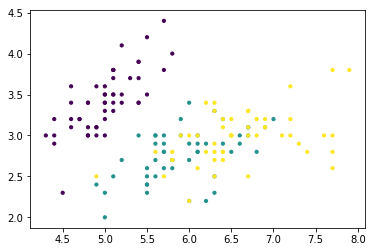

0.9800000000000001
0.9666666666666666
准确率
0.95
微平均精确率
0.95
宏平均精确率
0.9444444444444445
指定特定分类标签的精确率
0.9444444444444445
微平均召回率
0.95
宏平均召回率
0.9629629629629629
F1
0.9508021390374332
confusion_matrix
[[6 0 0]
 [0 5 0]
 [0 1 8]]
分类报告
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         6
     class 1       0.83      1.00      0.91         5
     class 2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

kappa score
海明距离
0.05
Jaccard距离
0.95
Jaccard距离正则化
19


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [19]:
# SVM模型
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import datasets
# import matplotlib.pyplot as plt
# centers=[[2,2],[8,2],[2,8],[8,8]]
#数量 维度 中心 方差
# x,y=datasets.make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
X,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)

plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap='rainbow')
plt.show()
print('交叉验证LinearSVC')
print(cross_val_score(LinearSVC(),X,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='linear'),X,y,cv=5,scoring='accuracy').mean())

linsvc=LinearSVC().fit(x_train,y_train)
y_true=y_test
y_pred=linsvc.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

print('='*100)

# x,y=datasets.make_circles(n_samples=1000,noise=0.03,factor=0.6)
print('交叉验证SVC')
plt.scatter(X[:,0],X[:,1],s=10,c=y)
plt.show()
print(cross_val_score(SVC(kernel='linear'),X,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(SVC(kernel='rbf'),X,y,cv=5,scoring='accuracy').mean())


y_true=y_test
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))




In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC  #这里有参数好棒
import numpy as np
import time
print(__doc__)
start = time.clock()

# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target  #这里读取数据即可

# #读取数据集

X,y=load_iris(return_X_y=True)

# # Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]}
#                     ]
tuned_parameters = dict(kernel=['rbf','linear'], gamma=[1,1e-1,1e-2,1e-3, 1e-4],
                     C=[1, 10, 100, 1000])
                    

# list=np.linspace(1,200,200);
# tuned_parameters = [ { 'n_neighbors': [2,4,8,16,32,64],
#                       'p': [2,3,4,5,6,7,8],
#                     }
#                    ]

# 这个可以研究一下子
# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# tuned_parameters=dict(
#     kernel=['rbf','linear'], 
#     C=[0.001,0.01,0.1,1,10,100,1000],
#     gama=[1e-4, 1e-3,1e-2,1e-1,1]
# )

# knn=KNeighborsClassifier(n_neighbors=2,p=4)

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
elapsed = (time.clock() - start)
print("Time used:",elapsed)

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set

Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

Grid scores on development set:

0.966 (+/-0.096) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.990 (+/-0.038) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.976 (+/-0.098) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.990 (+/-0.038) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.961 (+/-0.067) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.990 (+/-0.038) for {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
0.508 (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.990 (+/-0.038) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.126 (+/-0.015) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.990 (+/-0.038) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.979 (+/-0.051) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.955 (+/-0.090) for {'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.990 (+/-0.038) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.955 (+/-0.090) for {'C': 10, 'gamma': 0.1, 'kernel': 'line

# 朴素贝叶斯

In [21]:
# 朴素贝叶斯
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
# x,y=datasets.load_digits(return_X_y=True)
X,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)
print('交叉验证GaussianNB')

print(cross_val_score(GaussianNB(),X,y,cv=5,scoring='accuracy').mean())

gb=GaussianNB().fit(x_train,y_train)
y_true=y_test
y_pred=gb.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

print('='*100)

print('交叉验证BernoulliNB')
print(cross_val_score(BernoulliNB(),X,y,cv=5,scoring='accuracy').mean())

bb=BernoulliNB().fit(x_train,y_train)
y_true=y_test
y_pred=bb.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

print('='*100)


print('交叉验证MultinomialNB')
print(cross_val_score(MultinomialNB(),X,y,cv=5,scoring='accuracy').mean())

mnb=MultinomialNB().fit(x_train,y_train)
y_true=y_test
y_pred=mnb.predict(x_test)
print('准确率')
print(accuracy_score(y_test, y_pred))
print('微平均精确率')
print(metrics.precision_score(y_true, y_pred, average='micro'))  # 微平均，精确率
print('宏平均精确率')
print(metrics.precision_score(y_true, y_pred, average='macro'))  # 宏平均，精确率
print('指定特定分类标签的精确率')
print(metrics.precision_score(y_true, y_pred, labels=[0, 1, 2], average='macro'))  # 指定特定分类标签的精确率
#召回率
print('微平均召回率')
print(metrics.recall_score(y_true, y_pred, average='micro'))
print('宏平均召回率')
print(metrics.recall_score(y_true, y_pred, average='macro'))
# F1
print('F1')
print(metrics.f1_score(y_true, y_pred, average='weighted'))
# 混淆矩阵
print('confusion_matrix')
print(confusion_matrix(y_true, y_pred))
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
print('分类报告')
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))
# kappa score
print('kappa score')
cohen_kappa_score(y_true, y_pred)
# 海明距离
print('海明距离')
print(hamming_loss(y_true, y_pred))
# Jaccard距离
print('Jaccard距离')
print(jaccard_similarity_score(y_true, y_pred))
print('Jaccard距离正则化')
print(jaccard_similarity_score(y_true, y_pred, normalize=False))

print('='*100)


交叉验证GaussianNB
0.9533333333333334
准确率
0.95
微平均精确率
0.95
宏平均精确率
0.9444444444444445
指定特定分类标签的精确率
0.9444444444444445
微平均召回率
0.95
宏平均召回率
0.9629629629629629
F1
0.9508021390374332
confusion_matrix
[[6 0 0]
 [0 5 0]
 [0 1 8]]
分类报告
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00         6
     class 1       0.83      1.00      0.91         5
     class 2       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

kappa score
海明距离
0.05
Jaccard距离
0.95
Jaccard距离正则化
19
交叉验证BernoulliNB
0.3333333333333333
准确率
0.25
微平均精确率
0.25
宏平均精确率
0.08333333333333333
指定特定分类标签的精确率
0.08333333333333333
微平均召回率
0.25
宏平均召回率
0.3333333333333333
F1
0.1
confusion_matrix
[[0 6 0]
 [0 5 0]
 [0 9 0]]
分类报告
              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00         6
     class 1       0.25

C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similari

In [22]:
# 神经网络
# 神经网络
# 学习能力强，计算资源大，运转时间慢，还是使用深度学习运转好
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
# x,y=fetch_california_housing(return_X_y=True)
# iris=load_iris()
# x=iris.data
# y=iris.target
# print(x.shape)

X,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.13,random_state=13)

NN=MLPClassifier(hidden_layer_sizes=(100,),random_state=22)
# loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
acc=cross_val_score(NN,X,y,cv=5,scoring='accuracy').mean()
print("="*50)
print('1')
print(acc)

NN=MLPClassifier(hidden_layer_sizes=(100,100),random_state=22)
# loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
acc=cross_val_score(NN,X,y,cv=5,scoring='accuracy').mean()
print("="*50)
print('2')
print(acc)

NN=MLPClassifier(hidden_layer_sizes=(150,),random_state=22)
# loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
acc=cross_val_score(NN,X,y,cv=5,scoring='accuracy').mean()
print("="*50)
print('3')
print(acc)

NN=MLPClassifier(hidden_layer_sizes=(50,),random_state=22)
# loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
acc=cross_val_score(NN,X,y,cv=5,scoring='accuracy').mean()
print("="*50)
print('4')
print(acc)

NN=MLPClassifier(hidden_layer_sizes=(16,),random_state=22)
# loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
acc=cross_val_score(NN,X,y,cv=5,scoring='accuracy').mean()
print("="*50)
print('5')
print(acc)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklear

1
0.9800000000000001


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklear

2
0.9866666666666667


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklear

3
0.9800000000000001


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


4
0.9666666666666668


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5
0.8333333333333334


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## 决策树

In [23]:
# 决策树
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
# wine=load_wine()
# x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=22)
X,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)
# criterion 判定标准 splitter 是选取特征 random特征较多可以帮助过拟合
clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=22,splitter='random'
                                
#                                ,max_depth=10,min_samples_leaf=3,min_samples_split=3
                               ) #方便剪叶子  不剪叶子效果不错
clf.fit(x_train,y_train)
acc=clf.score(x_test,y_test)
print(acc)
print('交叉验证决策树')
print(cross_val_score(clf,X,y,cv=5,scoring='accuracy').mean())

0.9555555555555556
交叉验证决策树
0.9533333333333334


In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC  #这里有参数好棒
import numpy as np
import time
print(__doc__)
start = time.clock()

# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target  #这里读取数据即可

# #读取数据集

X,y=load_iris(return_X_y=True)

# # Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]}
#                     ]

tuned_parameters = dict(max_depth=[5,8,15,25,30],
                        min_samples_leaf=[1,2,5,10,15,100],
                        min_samples_split=[1,2,5,10],
                       )
                    

# list=np.linspace(1,200,200);
# tuned_parameters = [ { 'n_neighbors': [2,4,8,16,32,64],
#                       'p': [2,3,4,5,6,7,8],
#                     }
#                    ]

# 这个可以研究一下子
# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# tuned_parameters=dict(
#     kernel=['rbf','linear'], 
#     C=[0.001,0.01,0.1,1,10,100,1000],
#     gama=[1e-4, 1e-3,1e-2,1e-1,1]
# )

# # knn=KNeighborsClassifier(n_neighbors=2,p=4)
# clf=tree.DecisionTreeClassifier(criterion='entropy',random_state=22,splitter='random'
                                
# #                                ,max_depth=10,min_samples_leaf=3,min_samples_split=3
#                                ) #方便剪叶子  不剪叶子效果不错
# clf=tree.DecisionTreeClassifier()

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        tree.DecisionTreeClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
elapsed = (time.clock() - start)
print("Time used:",elapsed)

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

Best parameters set found on development set:

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Grid scores on development set:

nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 1}
0.966 (+/-0.096) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 1}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 1}
0.955 (+/-0.090) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.955 (+/-0.090

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

Best parameters set found on development set:

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}

Grid scores on development set:

nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 1}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 1}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
nan (+/-nan) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 1}
0.951 (+/-0.092) for {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.951 (+/-0.092

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

## Rand搜索

In [25]:
# from sklearn import datasets
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import scipy.stats  
import numpy as np
import time
print(__doc__)
start = time.clock()

# # Loading the Digits dataset
# digits = datasets.load_digits()

# # To apply an classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# X = digits.images.reshape((n_samples, -1))
# y = digits.target

# # Split the dataset in two equal parts
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

list=np.linspace(1,200,200);
#'C': scipy.stats.expon(scale=200)
# tuned_parameters = {'C': scipy.stats.expon(scale=200),
#                     'gamma': scipy.stats.expon(scale=.1),
#                     'kernel': ['rbf','poly'], 'class_weight':['balanced', None]}
tuned_parameters = dict(max_depth=[5,8,15,25,30],
                        min_samples_leaf=[1,2,5,10,15,100],
                        min_samples_split=[1,2,5,10],
                       )

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(
        tree.DecisionTreeClassifier(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true1, y_pred1 = y_test, clf.predict(X_test)
    print(classification_report(y_true1, y_pred1))
    print()

elapsed = (time.clock() - start)
print("Time used:",elapsed)

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

Best parameters set found on development set:

{'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 25}

Grid scores on development set:

0.955 (+/-0.090) for {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 25}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 15, 'max_depth': 5}
0.955 (+/-0.090) for {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 30}
0.955 (+/-0.090) for {'min_samples_split': 5, 'min_samples_leaf': 15, 'max_depth': 25}
0.955 (+/-0.090) for {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 8}
0.955 (+/-0.090) for {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 8}
0.955 (+/-0.090) for {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 15}
0.955 (+/-0.090) for {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 25}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 5, 'max_depth': 5}
0.955 (+/-0.090) for {'min_samples_split': 10, 'min_samples_leaf': 15, 'max_depth': 

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

Best parameters set found on development set:

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 25}

Grid scores on development set:

0.951 (+/-0.092) for {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 25}
0.333 (+/-0.000) for {'min_samples_split': 5, 'min_samples_leaf': 100, 'max_depth': 30}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 2, 'max_depth': 8}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 15, 'max_depth': 5}
0.951 (+/-0.092) for {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
0.951 (+/-0.092) for {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5}
0.951 (+/-0.092) for {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 25}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 10, 'max_depth': 5}
0.951 (+/-0.092) for {'min_samples_split': 2, 'min_samples_leaf': 15, 'max_depth': 15}
nan (+/-nan) for {'min_samples_split': 1, 'min_samples_leaf': 10, 'max_depth': 30}

Detail

## xgboost

In [26]:
import xgboost
from xgboost import XGBClassifier
X,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
acc=xgb.score(x_test,y_test)
print(acc)
print('交叉验证XGBOOST')
print(cross_val_score(clf,X,y,cv=5,scoring='accuracy').mean())

0.9111111111111111
交叉验证XGBOOST


C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

0.9466666666666667


C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C

In [27]:
####随机搜索的方法

# # from sklearn import datasets
# from sklearn.model_selection import train_test_split
# # from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report
# from sklearn.svm import SVC
# import scipy.stats  
# import numpy as np
# import time
# print(__doc__)
# start = time.clock()

# # # Loading the Digits dataset
# # digits = datasets.load_digits()

# # # To apply an classifier on this data, we need to flatten the image, to
# # # turn the data in a (samples, feature) matrix:
# # n_samples = len(digits.images)
# # X = digits.images.reshape((n_samples, -1))
# # y = digits.target

# # # Split the dataset in two equal parts
# # X_train, X_test, y_train, y_test = train_test_split(
# #     X, y, test_size=0.5, random_state=0)

# # Set the parameters by cross-validation
# # tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
# #                      'C': [1, 10, 100, 1000]},
# #                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# # list=np.linspace(1,200,200);
# #'C': scipy.stats.expon(scale=200)
# # tuned_parameters = {'C': scipy.stats.expon(scale=200),
# #                     'gamma': scipy.stats.expon(scale=.1),
# #                     'kernel': ['rbf','poly'], 'class_weight':['balanced', None]}
# X,y=load_iris(return_X_y=True)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)
# tuned_parameters = dict(eta=[0.01,0.015,0.025,0.05,0.1],
#                         gama=[0.05,0.1,0.3,0.5,0.7,0.9,1],
#                         max_depth=[3,5,7,9,12,15,17,25],
#                        )

# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = RandomizedSearchCV(
#         XGBClassifier(), tuned_parameters, scoring='%s_macro' % score
#     )
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true1, y_pred1 = y_test, clf.predict(X_test)
#     print(classification_report(y_true1, y_pred1))
#     print()

# elapsed = (time.clock() - start)
# print("Time used:",elapsed)

### 逻辑回归（作分类）与学习曲线

(569, 30)
[ 45 147 250 352 455]
[ 45 147 250 352 455]


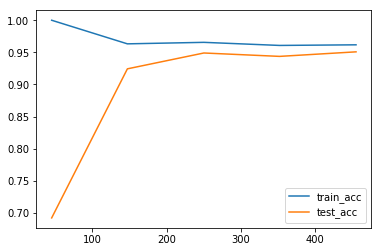

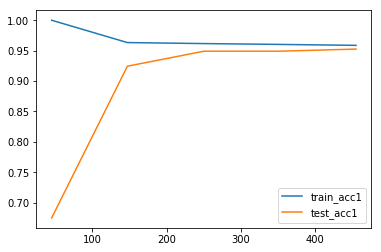

In [28]:
# 逻辑回归（作分类）与学习曲线
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
x,y=load_breast_cancer(return_X_y=True)
lrl1=LR(penalty="l1",solver="liblinear",C=1,max_iter=1000) # L1正则化必须改solver
lrl2=LR(penalty="l2",solver="liblinear",C=1,max_iter=1000) # GD迭代1000次，默认100下
train_size,train_acc,test_acc=learning_curve(lrl1,x,y,cv=5)
train_size1,train_acc1,test_acc1=learning_curve(lrl2,x,y,cv=5)
print(x.shape)
print(train_size)
print(train_size1)
# axis 因为运转5次会有5个结果得到均值
plt.plot(train_size,train_acc.mean(axis=1),label='train_acc')
# plt.legend()
# plt.show()
plt.plot(train_size,test_acc.mean(axis=1),label='test_acc')
plt.legend()
plt.show()
plt.plot(train_size1,train_acc1.mean(axis=1),label='train_acc1')
# plt.legend()
# plt.show()
plt.plot(train_size1,test_acc1.mean(axis=1),label='test_acc1')
plt.legend()
plt.show()
#竖向是准确率
#两条曲线的间距越小泛化能力越强

### 手动调参与参数验证曲线
### 第二个是调参曲线

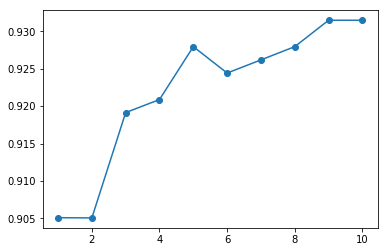

In [29]:
# 手动调参
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
x,y=load_breast_cancer(return_X_y=True)
acc=[]
for i in range(1,11):
    knn=KNeighborsClassifier(i)
    acc.append(cross_val_score(knn,x,y,cv=5).mean())
    
plt.plot(range(1,11),acc,'o-')
plt.show()

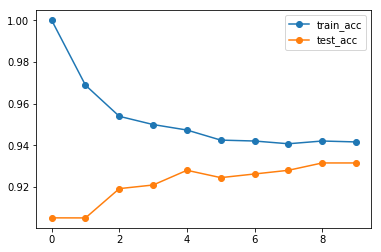

In [30]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer
x,y=load_breast_cancer(return_X_y=True)
#参数验证曲线
knn1=KNeighborsClassifier()
train_acc,test_acc=validation_curve(knn1,x,y,param_name='n_neighbors'
                                    ,param_range=range(1,11),cv=5)

# x1=range(1,11)
# y1=train_acc.mean(axis=1)
# print(len(x1))
# print(len(train_acc))
# plt.plot(x1, train_acc.mean(axis=1))
plt.plot(train_acc.mean(axis=1),'o-',label='train_acc')
plt.plot(test_acc.mean(axis=1),'o-',label='test_acc')
plt.legend()
plt.show()

# 回归

In [31]:
# from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
# 逻辑回归（作分类）与学习曲线
# x,y=fetch_california_housing(return_X_y=True)
x,y=load_boston(return_X_y=True)

lr=LinearRegression()
#均方误差可能是负的
loss=-cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss)

lasso=Lasso(alpha=0.01)
#均方误差可能是负的
loss1=-cross_val_score(lasso,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss1)

ridge=Ridge(alpha=0.01)
#均方误差可能是负的
loss2=-cross_val_score(ridge,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss2)

elasticNet=ElasticNet(alpha=0.01)
#均方误差可能是负的
loss3=-cross_val_score(elasticNet,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss3)

5.0 50.0
37.13180746769914
5.0 50.0
36.20073515675175
5.0 50.0
37.08313502629095
5.0 50.0
34.72302099893079


In [32]:
import numpy as np
from matplotlib import pyplot as plt


# 创建线性回归数据集
def create_dataset():
    X = 2 * np.random.rand(100, 1)
    # 结果加上高斯噪声
    y = 4 + 3*X + np.random.randn(100, 1)
    return X, y


# 线性回归解析法：使用正态方程求解，直接得到全局最优解
def linear_regression_analysis(X, y):
    # 特征向量为参数b添加值为1的特征
    X_b = np.c_[np.ones((100, 1)), X]
    # 用正态方程解得全局最优解
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    print("线性回归解析解为：", theta_best)
    # 预测
    sample = np.array([[0], [2]])
    sample_b = np.c_[np.ones((2, 1)), sample]
    predict = sample_b.dot(theta_best)
    # print('解析解方程预测为：', predict)
    # 绘制线性回归模型图像
    plt.plot(sample, predict, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 2, 0, 15])
    plt.show()
    return X_b


# 使用sk-learn的线性回归模型，默认使用解析法
def linear_regression_sk(X, y):
    from sklearn.linear_model import LinearRegression
    # 创建线性回归模型实例
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    print('sk-learn线性回归解析解：', 'b：', lin_reg.intercept_, 'w：', lin_reg.coef_)


# 线性回归批量梯度下降法（batch gradient descent）
def linear_regression_batch_gd(X_b, y):
    # 学习率不变、迭代次数和样本数
    learning_rate = 0.1
    max_iterations = 1000
    m = 100
    # 随机初始值
    theta = np.random.randn(2, 1)
    # 开始迭代
    for n in range(max_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - learning_rate*gradients
    print('线性回归批量梯度下降法解：', theta)


# 线性回归随机梯度下降法（stochastic gradient descent）
def linear_regression_stochastic_gd(X_b, y):
    # epoch次数，样本数
    n_epochs = 50
    m = 100
    theta = np.random.randn(2, 1)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            learning_rate = 1.0/(epoch*m + i + 10)
            theta = theta - learning_rate*gradients
    print('线性回归随机梯度下降法解：', theta)


# sk-learn 线性回归随机梯度下降
def linear_regression_stochastic_gd_sk(X, y):
    from sklearn.linear_model import SGDRegressor
#     sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
    sgd_reg=SGDRegressor()
    sgd_reg.fit(X, y.ravel())
    print('sk-learn线性回归随机梯度下降法解：',  'b：', sgd_reg.intercept_, 'w：', sgd_reg.coef_)


# 创建多项式回归数据集
def create_dataset_poly():
    m = 100
    X1 = 6 * np.random.rand(m, 1) - 3
    y1 = 0.5 * X1 ** 2 + X1 + 2 + np.random.randn(m, 1)
    return X1, y1


# 多项式回归
def polynomial_regression(X, y):
    # 添加二次特征
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)
    print('多项式回归解：', 'b：', lin_reg_poly.intercept_, 'w：', lin_reg_poly.coef_)
    return lin_reg_poly


# 绘制关于训练集规模的学习曲线
def plot_learning_curves(model, X, y):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()


# 岭回归，l2正则化，封闭方程求解
def ridge_regression_analysis(X, y):
    from sklearn.linear_model import Ridge
    ridge_reg = Ridge(alpha=1, solver="cholesky")
    ridge_reg.fit(X, y)
    print('岭回归解：', 'b：', ridge_reg.intercept_, 'w：', ridge_reg.coef_)


# Lasso 回归，l2正则化，封闭方程求解
def lasso_regression_analysis(X, y):
    from sklearn.linear_model import Lasso
    lasso_reg = Lasso(alpha=0.1)
    lasso_reg.fit(X, y)
    print('Lasso 回归解：', 'b：', lasso_reg.intercept_, 'w：', lasso_reg.coef_)


# l2,l1正则化，梯度下降求解
def regularization_regression_gd(X, y):
    from sklearn.linear_model import SGDRegressor
    # l1正则化把 penalty="l2" 改为 penalty="l1"
    sgd_reg = SGDRegressor(penalty="l2")
    sgd_reg.fit(X, y.ravel())
    print('l2梯度下降法解：', 'b：', sgd_reg.intercept_, 'w：', sgd_reg.coef_)


# 弹性网路正则化，即l1、l2混合正则化
def elasticnet_regression_gd(X, y):
    from sklearn.linear_model import ElasticNet
    # l1_ratio 指的就是混合率, 即l1正则化占的比例
    elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
    elastic_net.fit(X, y)
    print('弹性网络解：', 'b：', elastic_net.intercept_, 'w：', elastic_net.coef_)


# 早期停止法（Early Stopping）
def early_stoping(X, y):
    from sklearn.base import clone
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    # 当warm_start=True时，调用fit()方法后，训练会从停下来的地方继续，而不是从头重新开始。
    sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    for epoch in range(1000):
        sgd_reg.fit(X_train,  y_train.ravel())
        y_val_predict = sgd_reg.predict(X_val)
        val_error = mean_squared_error(y_val_predict, y_val)
        if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)
    print('stopping in:', best_epoch)


# 加载鸢尾花数据集
def load_dataset_flower():
    from sklearn import datasets
    iris = datasets.load_iris()
    # X_f = iris['data']
    # y_f = iris['target']
    # print('加载鸢尾花数据集成功：', iris)
    return iris


# logistic 回归
def logistic_classify(iris):
    from sklearn.linear_model import LogisticRegression
    X = iris["data"][:, 3:]  # petal width
    y = (iris["target"] == 2).astype(np.int)
    log_reg = LogisticRegression()
    log_reg.fit(X, y)
    # 绘图
    X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
    y_proba = log_reg.predict_proba(X_new)
    plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
    plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
    plt.show()


# softmax 回归多分类
def softmax_classify(iris):
    from sklearn.linear_model import LogisticRegression
    # 划分数据集
    X = iris["data"][:, (2, 3)]  # petal length, petal width
    y = iris["target"]
    # 创建 softmax 回归实例
    softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
    softmax_reg.fit(X, y)
    # 预测
    predict = softmax_reg.predict([[5, 2]])
    predict_pro = softmax_reg.predict_proba([[5, 2]])
    print('softmax回归预测为：', predict, '各类概率为', predict_pro)





线性回归解析解为： [[4.22355411]
 [2.81917525]]


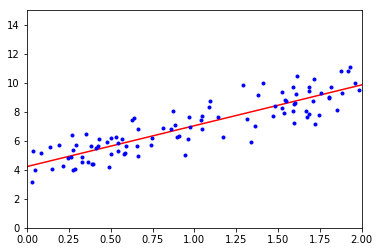

In [33]:
if __name__ == '__main__':
    # 获得线性回归数据集
    X, y = create_dataset()
    # 线性回归解析法
    X_b = linear_regression_analysis(X, y)
    

In [34]:
# sk-learn线性回归解
linear_regression_sk(X, y)

sk-learn线性回归解析解： b： [4.22355411] w： [[2.81917525]]


In [35]:
# 线性回归批量梯度下降法
linear_regression_batch_gd(X_b, y)

线性回归批量梯度下降法解： [[4.22355411]
 [2.81917525]]


In [36]:
# 线性回归随机梯度下降法
linear_regression_stochastic_gd(X_b, y)

线性回归随机梯度下降法解： [[4.10398421]
 [2.93902377]]


In [37]:
# sk-learn线性回归随机梯度下降法
linear_regression_stochastic_gd_sk(X, y)    

sk-learn线性回归随机梯度下降法解： b： [3.85037111] w： [3.13307185]


In [38]:
# 获得多项式回归数据集
X1, y1 = create_dataset_poly()
# 多项式回归解
lin_reg_poly = polynomial_regression(X1, y1)

多项式回归解： b： [1.83115897] w： [[0.93540815 0.52421009]]


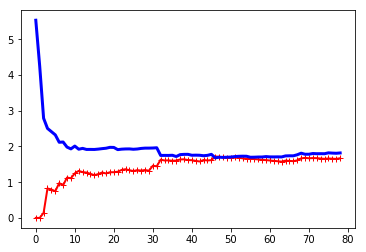

In [39]:
# 获得关于训练集规模的学习曲线
plot_learning_curves(lin_reg_poly, X1, y1)

In [40]:
# 岭回归，l2正则化
ridge_regression_analysis(X, y)

岭回归解： b： [4.30135436] w： [[2.74118273]]


In [41]:
# lasso回归，l1正则化
lasso_regression_analysis(X, y)


Lasso 回归解： b： [4.50737412] w： [2.53465384]


In [42]:
# 梯度下降法的正则化
regularization_regression_gd(X, y)

l2梯度下降法解： b： [3.860823] w： [3.12333145]


In [43]:
# 弹性网络
elasticnet_regression_gd(X, y)

弹性网络解： b： [4.69803352] w： [2.34352328]


In [44]:
# 早期停止
early_stoping(X, y)

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

stopping in: 978


C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: Converg

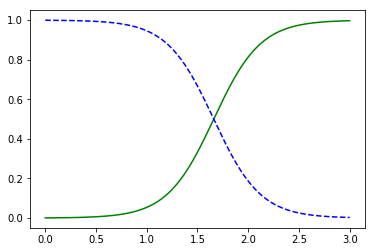

In [45]:
# 加载花的数据集
iris = load_dataset_flower()
# logistic 回归二分类
logistic_classify(iris)

In [46]:
# softmax 多分类
softmax_classify(iris)

softmax回归预测为： [2] 各类概率为 [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


In [47]:
#集成学习
#bagging  模型独立，共同决策  100个决策树 40 A, 60 B  则该数据集是60
#boosting 模型有序，逐渐提升  第一颗决策树 60%是正确的，40%错误的（加权重） 
#逐渐决策树，拿到前面决策树的不好结果
# from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import fetch_california_housing
# 集成模块
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
#随机森林
rfc=RandomForestRegressor(random_state=22,
                           n_estimators=500,
                           max_depth=5
#                            min_samples_leaf=10,
#                            min_impurity_split=10,
#                            max_features='auto'
                          )

#集成模块
bgc=BaggingRegressor(random_state=22)
# .fit(x_train,y_train)
adc=AdaBoostRegressor(learning_rate=0.1,random_state=22)
# .fit(x_train,y_train)

# x,y=fetch_california_housing(return_X_y=True)
x,y=load_boston(return_X_y=True)

loss=-cross_val_score(rfc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)
#集成模块
bgc=BaggingRegressor(random_state=22)
loss=-cross_val_score(bgc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)
adc=AdaBoostRegressor(learning_rate=0.1,random_state=22)
loss=-cross_val_score(adc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

22.40493106825978
23.735036752086973
25.90335183169126


In [48]:
# from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
# 逻辑回归（作分类）与学习曲线
# x,y=fetch_california_housing(return_X_y=True)
x,y=load_boston(return_X_y=True)

lr=LinearRegression()
#均方误差可能是负的
loss=-cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss)

lasso=Lasso(alpha=0.01)
#均方误差可能是负的
loss1=-cross_val_score(lasso,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss1)

ridge=Ridge(alpha=0.01)
#均方误差可能是负的
loss2=-cross_val_score(ridge,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss2)

elasticNet=ElasticNet(alpha=0.01)
#均方误差可能是负的
loss3=-cross_val_score(elasticNet,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss3)

5.0 50.0
37.13180746769914
5.0 50.0
36.20073515675175
5.0 50.0
37.08313502629095
5.0 50.0
34.72302099893079


In [49]:
### KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
knr=KNeighborsRegressor()
x,y=load_boston(return_X_y=True)

loss=-cross_val_score(knr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss)
print(explained_variance_score(y_true, y_pred))

5.0 50.0
76.9429900135896
0.9184510250569476


In [50]:
# 可释方差值
from sklearn.metrics import explained_variance_score
# 平均绝对误差
from sklearn.metrics import mean_absolute_error
# 中值绝对误差
from sklearn.metrics import median_absolute_error
# R方值，确定系数
from sklearn.metrics import r2_score

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
x,y=load_boston(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_true=y_test
y_pred=knn.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))



可释方差值
0.5621064099959516
平均绝对误差
4.578684210526315
中值绝对误差
3.119999999999999
R方值
0.561942000023901


In [51]:
# SVM
from sklearn.svm import SVR
svr=SVR()
loss=-cross_val_score(svr,x,y,cv=5,scoring='neg_mean_squared_error').mean()
#保证这个是0.3比较好
print(y.min(),y.max())
print(loss)
# knn=KNeighborsRegressor()
# knn.fit(x_train,y_train)
svr=SVR()
svr.fit(x_train,y_train)
y_true=y_test
y_pred=svr.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

5.0 50.0
71.85800739156483
可释方差值
0.2520490041025495
平均绝对误差
5.605265477148482
中值绝对误差
3.55775271983977
R方值
0.19295517950347596


In [52]:
# 可释方差值
from sklearn.metrics import explained_variance_score
# 平均绝对误差
from sklearn.metrics import mean_absolute_error
# 中值绝对误差
from sklearn.metrics import median_absolute_error
# R方值，确定系数
from sklearn.metrics import r2_score
# 神经网络
# 学习能力强，计算资源大，运转时间慢，还是使用深度学习运转好
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
# x,y=fetch_california_housing(return_X_y=True)
# print(x.shape)
NN=MLPRegressor(hidden_layer_sizes=(100,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)


NN.fit(x_train,y_train)
y_true=y_test
y_pred=NN.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

50.38975855468118
可释方差值
0.6525439870196155
平均绝对误差
4.296521997019493
中值绝对误差
3.485446647252978
R方值
0.651825276274272


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
NN=MLPRegressor(hidden_layer_sizes=(100,100),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

NN.fit(x_train,y_train)
y_true=y_test
y_pred=NN.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

67.325867623275
可释方差值
0.6277039608874936
平均绝对误差
4.48221903703113
中值绝对误差
3.5910988652696805
R方值
0.6276751168162944


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
NN=MLPRegressor(hidden_layer_sizes=(150,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

NN.fit(x_train,y_train)
y_true=y_test
y_pred=NN.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


65.63593602212984
可释方差值
0.3980105100989638
平均绝对误差
5.105853463487972
中值绝对误差
3.4376225065362878
R方值
0.38708283672615196


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [55]:
NN=MLPRegressor(hidden_layer_sizes=(50,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

NN.fit(x_train,y_train)
y_true=y_test
y_pred=NN.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


55.755316211356934
可释方差值
0.5395642844927673
平均绝对误差
4.63096915590444
中值绝对误差
3.168274408732822
R方值
0.5358714000592386


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
NN=MLPRegressor(hidden_layer_sizes=(16,),random_state=22)
loss=-cross_val_score(NN,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)


NN.fit(x_train,y_train)
y_true=y_test
y_pred=NN.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda\lib\site-packages\sklear

102.8560365814454
可释方差值
0.26137250181993266
平均绝对误差
5.711669883988148
中值绝对误差
3.7793812570924956
R方值
0.2545956354720741


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
# 决策树
# from sklearn.datasets import load_wine
# from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#这是什么
# x,y=fetch_california_housing(return_X_y=True)
x,y=load_boston(return_X_y=True)
# x,y=load_boston(return_X_y=True)
# criterion 判定标准 splitter 是选取特征 random特征较多可以帮助过拟合
dtc=DecisionTreeRegressor(criterion='entropy',random_state=22,splitter='random'
#                                ,max_depth=10,min_samples_leaf=3,min_samples_split=3
                               ) #方便剪叶子  不剪叶子效果不错
# dtc=DecisionTreeRegressor(criterion='entropy',random_state=22,splitter='random'
# #                                ,max_depth=10,min_samples_leaf=3,min_samples_split=3
#                                ) #方便剪叶子  不剪叶子效果不错

loss=-cross_val_score(dtc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

nan


C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
C:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'entropy'

  FitFailedWarning)
C:\anaconda\lib\site

In [58]:

#集成学习
#bagging  模型独立，共同决策  100个决策树 40 A, 60 B  则该数据集是60
#boosting 模型有序，逐渐提升  第一颗决策树 60%是正确的，40%错误的（加权重） 
#逐渐决策树，拿到前面决策树的不好结果
# from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# 集成模块
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
#随机森林
rfc=RandomForestRegressor(random_state=22,
                           n_estimators=500,
                           max_depth=5
#                            min_samples_leaf=10,
#                            min_impurity_split=10,
#                            max_features='auto'
                          )
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)
loss=-cross_val_score(rfc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)


rfc.fit(x_train,y_train)
y_true=y_test
y_pred=rfc.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))


22.40493106825978
可释方差值
0.8518186348135881
平均绝对误差
2.4730537422034637
中值绝对误差
1.6573279616969732
R方值
0.8504396828744805


In [59]:
#集成模块
bgc=BaggingRegressor(random_state=22)
loss=-cross_val_score(bgc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

bgc.fit(x_train,y_train)
y_true=y_test
y_pred=bgc.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

23.735036752086973
可释方差值
0.8391874677009551
平均绝对误差
2.488552631578947
中值绝对误差
1.535000000000002
R方值
0.8386441352804235


In [60]:
adc=AdaBoostRegressor(learning_rate=0.1,random_state=22)
loss=-cross_val_score(adc,x,y,cv=5,scoring='neg_mean_squared_error').mean()
print("="*100)
print(loss)

adc.fit(x_train,y_train)
y_true=y_test
y_pred=adc.predict(x_test)
print('可释方差值')
print(explained_variance_score(y_true, y_pred))

print('平均绝对误差')
print(mean_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('中值绝对误差')
print(median_absolute_error(y_true, y_pred))

# y_true = [3, -0.5, 2, 7]
# y_pred = [2.5, 0.0, 2, 8]
print('R方值')
print(r2_score(y_true, y_pred))

25.90335183169126
可释方差值
0.8355178258101629
平均绝对误差
2.9131808206255174
中值绝对误差
2.2960129635212487
R方值
0.832920305275326


In [61]:
# xgboost
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as MSE
# 自己命令行下载好太多了
import xgboost
x,y=fetch_california_housing(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
dtrain=xgboost.DMatrix(x_train,y_train)
dtest=xgboost.DMatrix(x_test,y_test)
# silent默认是true False将建树过程给弄出来,objective 默认是分类， eta学习率
param={'silent':False,'objective':'reg:linear' #默认是分类，这个是搞回归
       ,"eta":0.1}
xgb=xgboost.train(param,dtrain,num_boost_round=175)
pred=xgb.predict(dtest)

print(MSE(y_test,pred)) #如果接近0.3 
# xgboost可以说是大杀器，在一些比赛去玩玩，多参加一些小比赛

[19:43:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.20682373460421405


# 降维

(150, 2)


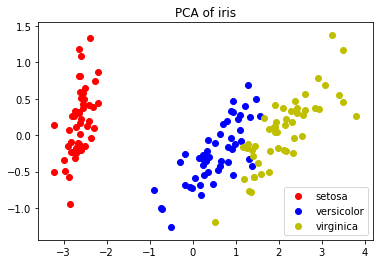

In [62]:
# 降维
# PCA SVD

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris=load_iris()
x=iris.data
y=iris.target

# 根据信息保存率玩维度
pca=PCA(2) #这是需要降低的维数
x=pca.fit_transform(x)
# pca=PCA(n_components=0.95,svd_solver='full')
# x=pca.fit_transform(x)
# print(x.shape)
print(x.shape)

plt.figure()
# 第0类样本 第0维度特征，第1维度特征
plt.scatter(x[y==0,0],x[y==0,1],c="r",label=iris.target_names[0])
# 第1类样本 第0维度特征，第1维度特征
plt.scatter(x[y==1,0],x[y==1,1],c="b",label=iris.target_names[1])
# 第2类样本 第0维度特征，第1维度特征
plt.scatter(x[y==2,0],x[y==2,1],c="y",label=iris.target_names[2])
plt.legend()
plt.title("PCA of iris")
plt.show()



In [63]:
# 如果PCA计算协方差矩阵，因此矩阵太大，资源计算不够，可以尝试SVD
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
iris=load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)
# print(x.shape)
svd=TruncatedSVD(2)
x=svd.fit_transform(x)
print(x.shape)

(150, 4)
(150,)
(150, 2)


# 聚类

* 在聚类问题中，Silhouette分析用来研究聚类结果的类间距离。
* Silhouette数值度量在相同类中的点，与不同类中的点相比的紧密程度。
* Silhouette图可视化这一测度，这样就提供了一种评价类个数的方法。
* Silhouette值在[-1, 1]内，接近1表示样本远离邻近类，取0表示样本几乎在两个近邻类的决策边界上，取负值表示样本被分在错误的类里。在本例中，我们使用Silhouette分析选择一个类个数参数n_clusters的最优值。


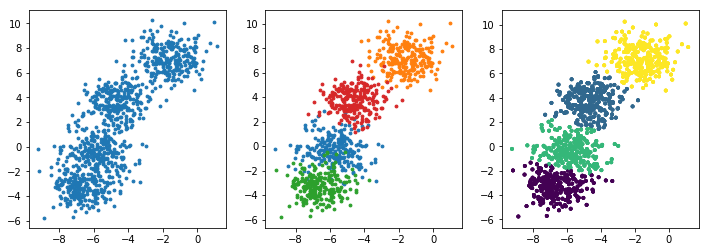

0.4933462526132956
0.5251469712039056


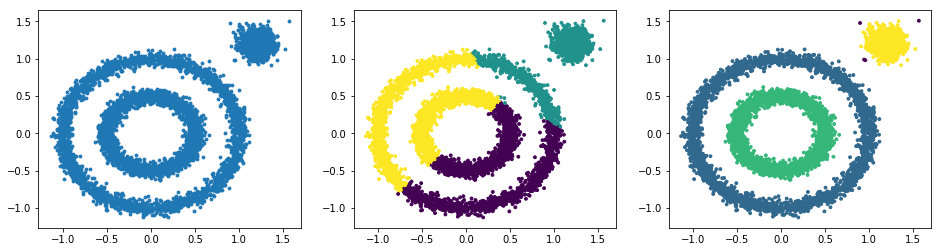

In [64]:
#### 这个掌握不太熟练
'''
对于这个以后好好掌握DBSCAN就行了
'''
#聚类分析
#K-MEANS + DBSCAN
from sklearn import datasets

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans,DBSCAN

from sklearn.metrics import silhouette_score

import numpy as np

x,y=datasets.make_blobs(n_samples=1000,n_features=2, centers=4,random_state=22)

fig,ax=plt.subplots(1,3,figsize=(12,4))

ax[0].scatter(x[:,0],x[:,1],s=8)

color=["r","green","b","orange"]

for i in range(4):
    ax[1].scatter(x[y==i,0],x[y==i,1],s=8)

# 聚类n_cluster 是啥
pred=KMeans(n_clusters=4,random_state=22).fit_predict(x)

for i in range(4):
    ax[2].scatter(x[:,0],x[:,1],s=8,c=pred)
    
plt.show()
#聚类情况
print(silhouette_score(x,y))

print(silhouette_score(x,pred))

#### 最棒的算法
# DBSCAN算法 运转功能极其不错
# centerst=[[1.2,1.2]]
x1,_=datasets.make_circles(n_samples=5000
                           ,noise=0.05
                           ,factor=0.5)
x2,_=datasets.make_blobs(n_samples=1000
                         ,n_features=2
                         , centers=[[1.2,1.2]]
                         ,cluster_std=0.1)

fig,ax=plt.subplots(1,3,figsize=(16,4))

x=np.concatenate((x1,x2))

ax[0].scatter(x[:,0],x[:,1],s=8)

pred=KMeans(n_clusters=3).fit_predict(x)

ax[1].scatter(x[:,0],x[:,1],s=8,c=pred)

# 降低eps值 提高min_sample值，可以提高这个算法的效率
pred=DBSCAN(eps=0.1,min_samples=10).fit_predict(x) #提高成蔟条件，减小领域，增大样本要求

ax[2].scatter(x[:,0],x[:,1],s=8,c=pred)

plt.show()

# 降维

## AutoEncoder

C:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W0524 19:43:54.492076 12944 deprecation.py:323] From <ipython-input-65-51bf559e66e1>:57: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dropout instead.
W0524 19:43:54.496054 12944 deprecation.py:323] From C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\tensorflow_core\python\layers\core.py:271: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
W0524 19:43:54.512066 12944 deprecation.py:323] From <ipython-input-65-51bf559e66e1>:62: dense (from te

0 Train MSE: 712.8308
100 Train MSE: 16.68819
200 Train MSE: 15.622777
300 Train MSE: 15.454376
400 Train MSE: 15.1798525
500 Train MSE: 14.771431
600 Train MSE: 14.273061
700 Train MSE: 13.887284
800 Train MSE: 13.687128
900 Train MSE: 13.587312


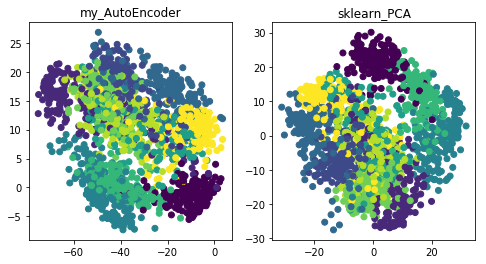

In [65]:
# coding:utf-8
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def reset_graph(seed=42):
    '''
    reset deafault graph
    :param seed: random seed
    :return:
    '''
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

def AutoEncoder(data,
                hidden_layers = None,
                noise = 0,
                drop_rate = 0,
                n_epochs = 301,
                learning_rate = 0.01,
                optimizer_type = 'adam',
                verbose = 1):
    '''

    :param data: (n_samples, n_features)
    :param hidden_layers: list hidden layers units num
    :param noise: normal noise
    :param drop_rate:
    :param n_epochs:
    :param learning_rate:
    :param optimizer_type:
    :param verbose:
    :return:
    '''


    reset_graph()
    n_inputs = data.shape[1]
    n_outputs = n_inputs

    X = tf.placeholder(tf.float32, shape=[None, n_inputs])

    # add noise
    X_noise = X + noise * tf.random_normal(tf.shape(X))

    # dropout
    training = tf.placeholder_with_default(False, shape=(), name = "training")
    X_drop = tf.layers.dropout(X_noise, drop_rate, training=training)

    hiddens = [X_drop]
    for i in range(len(hidden_layers)):
        n_layer = hidden_layers[i]
        hidden = tf.layers.dense(hiddens[i], n_layer, )
        hiddens.append(hidden)

    outputs = tf.layers.dense(hiddens[-1], n_outputs)
    hiddens.append(outputs)

    reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

    if optimizer_type == 'adam':
        optimizer = tf.train.AdamOptimizer(learning_rate)
    else:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)

    training_op = optimizer.minimize(reconstruction_loss)

    init = tf.global_variables_initializer()

    # coding layer
    codings = hiddens[len(hiddens)//2]

    with tf.Session() as sess:
        init.run()
        for epoch in range(n_epochs):
            sess.run(training_op, feed_dict={X: data, training: True})
            loss_train = reconstruction_loss.eval(feed_dict={X: data})
            if epoch % 100 == 0 and verbose:
                print("\r{}".format(epoch), "Train MSE:", loss_train)
        data_ndim = codings.eval(feed_dict={X: data})

    return data_ndim

if __name__ == '__main__':
    iris = load_digits()
    X = iris.data
    Y = iris.target
    data_1 = AutoEncoder(X, [2], learning_rate = 0.2,  n_epochs = 1000)

    data_2 = PCA(n_components=2).fit_transform(X)

    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("my_AutoEncoder")
    plt.scatter(data_1[:, 0], data_1[:, 1], c = Y)

    plt.subplot(122)
    plt.title("sklearn_PCA")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = Y)
    plt.savefig("AutoEncoder.png")
    plt.show()

## ICA

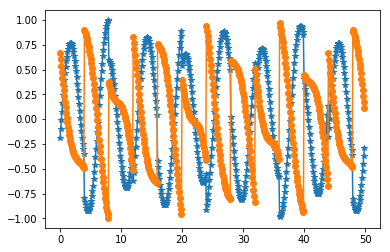

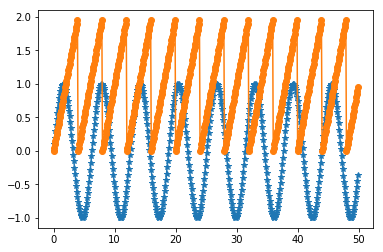

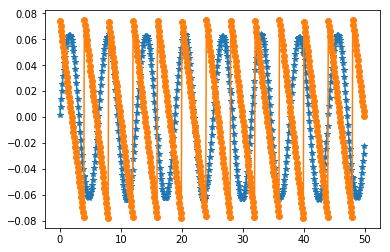

In [66]:
# coding:utf-8
# 代码来源:https://blog.csdn.net/lizhe_dashuju/article/details/50263339


# FastICA
import math
import random
import matplotlib.pyplot as plt
from numpy import *

n_components = 2

def f1(x, period = 4):
    return 0.5*(x-math.floor(x/period)*period)

def create_data():
    #data number
    n = 500
    #data time
    T = [0.1*xi for xi in range(0, n)]
    #source
    S = array([[sin(xi)  for xi in T], [f1(xi) for xi in T]], float32)
    #mix matrix
    A = array([[0.8, 0.2], [-0.3, -0.7]], float32)
    return T, S, dot(A, S)

def whiten(X):
    #zero mean
    X_mean = X.mean(axis=-1)
    X -= X_mean[:, newaxis]
    #whiten
    A = dot(X, X.transpose())
    D , E = linalg.eig(A)
    D2 = linalg.inv(array([[D[0], 0.0], [0.0, D[1]]], float32))
    D2[0,0] = sqrt(D2[0,0]); D2[1,1] = sqrt(D2[1,1])
    V = dot(D2, E.transpose())
    return dot(V, X), V

def _logcosh(x, fun_args=None, alpha = 1):
    gx = tanh(alpha * x, x); g_x = gx ** 2; g_x -= 1.; g_x *= -alpha
    return gx, g_x.mean(axis=-1)

def do_decorrelation(W):
    #black magic
    s, u = linalg.eigh(dot(W, W.T))
    return dot(dot(u * (1. / sqrt(s)), u.T), W)

def do_fastica(X):
    n, m = X.shape; p = float(m); g = _logcosh
    #black magic
    X *= sqrt(X.shape[1])
    #create w
    W = ones((n,n), float32)
    for i in range(n): 
        for j in range(i):
            W[i,j] = random.random()

    #compute W
    maxIter = 200
    for ii in range(maxIter):
        gwtx, g_wtx = g(dot(W, X))
        W1 = do_decorrelation(dot(gwtx, X.T) / p - g_wtx[:, newaxis] * W)
        lim = max( abs(abs(diag(dot(W1, W.T))) - 1) )
        W = W1
        if lim < 0.0001:
            break
    return W

def show_data(T, S):
    plt.plot(T, [S[0,i] for i in range(S.shape[1])], marker="*")
    plt.plot(T, [S[1,i] for i in range(S.shape[1])], marker="o")
    plt.show()

def main():
    T, S, D = create_data()
    Dwhiten, K = whiten(D)
    W = do_fastica(Dwhiten)
    #Sr: reconstructed source
    Sr = dot(dot(W, K), D)
    show_data(T, D)
    show_data(T, S)
    show_data(T, Sr)
    
main()
    

## ISOMAP

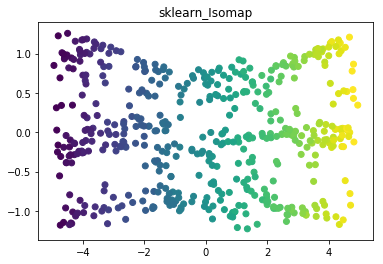

In [67]:
# coding:utf-8
import numpy as np
from sklearn.datasets import make_s_curve
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# from mpl_toolkits.mplot3d import Axes3D

# def floyd(D,n_neighbors=15):
#     Max = np.max(D)*1000
#     n1,n2 = D.shape
#     k = n_neighbors
#     D1 = np.ones((n1,n1))*Max
#     D_arg = np.argsort(D,axis=1)
#     for i in range(n1):
#         D1[i,D_arg[i,0:k+1]] = D[i,D_arg[i,0:k+1]]
#     for k in range(n1):
#         for i in range(n1):
#             for j in range(n1):
#                 if D1[i,k]+D1[k,j]<D1[i,j]:
#                     D1[i,j] = D1[i,k]+D1[k,j]
#     return D1

# def cal_pairwise_dist(x):
#     '''计算pairwise 距离, x是matrix
#     (a-b)^2 = a^2 + b^2 - 2*a*b
#     '''
#     sum_x = np.sum(np.square(x), 1)
#     dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
#     #返回任意两个点之间距离的平方
#     return dist

# def my_mds(dist, n_dims):
#     # dist (n_samples, n_samples)
#     dist = dist**2
#     n = dist.shape[0]
#     T1 = np.ones((n,n))*np.sum(dist)/n**2
#     T2 = np.sum(dist, axis = 1)/n
#     T3 = np.sum(dist, axis = 0)/n

#     B = -(T1 - T2 - T3 + dist)/2

#     eig_val, eig_vector = np.linalg.eig(B)
#     index_ = np.argsort(-eig_val)[:n_dims]
#     picked_eig_val = eig_val[index_].real
#     picked_eig_vector = eig_vector[:, index_]

#     return picked_eig_vector*picked_eig_val**(0.5)

# def my_Isomap(data,n=2,n_neighbors=30):
#     D = cal_pairwise_dist(data)**0.5
#     D_floyd=floyd(D, n_neighbors)
#     data_n = my_mds(D_floyd, n_dims=n)
#     return data_n

# def scatter_3d(X, y):
#     fig = plt.figure(figsize=(6, 5))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
#     ax.view_init(10, -70)
#     ax.set_xlabel("$x_1$", fontsize=18)
#     ax.set_ylabel("$x_2$", fontsize=18)
#     ax.set_zlabel("$x_3$", fontsize=18)
#     plt.show()

if __name__ == '__main__':
    X, Y = make_s_curve(n_samples = 500,
                           noise = 0.1,
                           random_state = 42)
  #     data_1 = my_Isomap(X, 2, 10)

    data_2 = Isomap(n_neighbors = 10, n_components = 2).fit_transform(X)

#     plt.figure(figsize=(8,4))
#     plt.subplot(121)
#     plt.title("my_Isomap")
#     plt.scatter(data_1[:, 0], data_1[:, 1], c = Y)

#     plt.subplot(122)
    plt.title("sklearn_Isomap")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = Y)
    plt.savefig("Isomap.png")
    plt.show()

## LDA

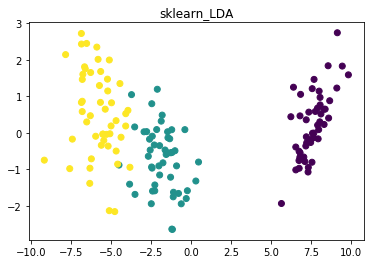

In [68]:
#coding:utf-8
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''


# def lda(data, target, n_dim):
#     '''
#     :param data: (n_samples, n_features)
#     :param target: data class
#     :param n_dim: target dimension
#     :return: (n_samples, n_dims)
#     '''

#     clusters = np.unique(target)

#     if n_dim > len(clusters)-1:
#         print("K is too much")
#         print("please input again")
#         exit(0)

#     #within_class scatter matrix
#     Sw = np.zeros((data.shape[1],data.shape[1]))
#     for i in clusters:
#         datai = data[target == i]
#         datai = datai-datai.mean(0)
#         Swi = np.mat(datai).T*np.mat(datai)
#         Sw += Swi

#     #between_class scatter matrix
#     SB = np.zeros((data.shape[1],data.shape[1]))
#     u = data.mean(0)  #所有样本的平均值
#     for i in clusters:
#         Ni = data[target == i].shape[0]
#         ui = data[target == i].mean(0)  #某个类别的平均值
#         SBi = Ni*np.mat(ui - u).T*np.mat(ui - u)
#         SB += SBi
#     S = np.linalg.inv(Sw)*SB
#     eigVals,eigVects = np.linalg.eig(S)  #求特征值，特征向量
#     eigValInd = np.argsort(eigVals)
#     eigValInd = eigValInd[:(-n_dim-1):-1]
#     w = eigVects[:,eigValInd]
#     data_ndim = np.dot(data, w)

#     return data_ndim

if __name__ == '__main__':
    iris = load_iris()
    X = iris.data
    Y = iris.target
#     data_1 = lda(X, Y, 2)

    data_2 = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, Y)


#     plt.figure(figsize=(8,4))
#     plt.subplot(121)
#     plt.title("my_LDA")
#     plt.scatter(data_1[:, 0], data_1[:, 1], c = Y)

#     plt.subplot(122)
    plt.title("sklearn_LDA")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = Y)
    plt.savefig("LDA.png")
    plt.show()

## LE

max_dist 5935.0
eig_val[:10]:  [1.30104261e-17 2.91631146e-03 6.65082203e-03 9.90821980e-03
 1.27832277e-02 1.33949749e-02 2.31575990e-02 2.53186872e-02
 3.87587872e-02 4.51036101e-02]
j:  1
[0.00291631 0.00665082]
[[ 1.40711219e+01 -5.21913242e-14]
 [-5.21729470e-14  1.26249455e+01]]


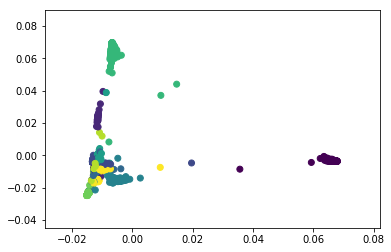

In [69]:
# coding:utf-8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

def rbf(dist, t = 1.0):
    '''
    rbf kernel function
    '''
    return np.exp(-(dist/t))

def cal_pairwise_dist(x):

    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def cal_rbf_dist(data, n_neighbors = 10, t = 1):

    dist = cal_pairwise_dist(data)
    n = dist.shape[0]
    rbf_dist = rbf(dist, t)

    W = np.zeros((n, n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1+n_neighbors]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i]

    return W

def le(data,
          n_dims = 2,
          n_neighbors = 5, t = 1.0):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target dim
    :param n_neighbors: k nearest neighbors
    :param t: a param for rbf
    :return:
    '''
    N = data.shape[0]
    W = cal_rbf_dist(data, n_neighbors, t)
    D = np.zeros_like(W)
    for i in range(N):
        D[i,i] = np.sum(W[i])

    D_inv = np.linalg.inv(D)
    L = D - W
    eig_val, eig_vec = np.linalg.eig(np.dot(D_inv, L))

    sort_index_ = np.argsort(eig_val)

    eig_val = eig_val[sort_index_]
    print("eig_val[:10]: ", eig_val[:10])

    j = 0
    while eig_val[j] < 1e-6:
        j+=1

    print("j: ", j)

    sort_index_ = sort_index_[j:j+n_dims]
    eig_val_picked = eig_val[j:j+n_dims]
    print(eig_val_picked)
    eig_vec_picked = eig_vec[:, sort_index_]

    # print("L: ")
    # print(np.dot(np.dot(eig_vec_picked.T, L), eig_vec_picked))
    # print("D: ")
    # D not equal I ???
    print(np.dot(np.dot(eig_vec_picked.T, D), eig_vec_picked))

    X_ndim = eig_vec_picked
    return X_ndim

if __name__ == '__main__':
    # X, Y = make_swiss_roll(n_samples = 2000)
    # X_ndim = le(X, n_neighbors = 5, t = 20)
    #
    # fig = plt.figure(figsize=(12,6))
    # ax1 = fig.add_subplot(121, projection='3d')
    # ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c = Y)
    #
    # ax2 = fig.add_subplot(122)
    # ax2.scatter(X_ndim[:, 0], X_ndim[:, 1], c = Y)
    # plt.show()

    X = load_digits().data
    y = load_digits().target

    dist = cal_pairwise_dist(X)
    max_dist = np.max(dist)
    print("max_dist", max_dist)
    X_ndim = le(X, n_neighbors = 20, t = max_dist*0.1)
    plt.scatter(X_ndim[:, 0], X_ndim[:, 1], c = y)
    plt.show()


max_dist 5935.0
eig_val[:10]:  [1.30104261e-17 2.91631146e-03 6.65082203e-03 9.90821980e-03
 1.27832277e-02 1.33949749e-02 2.31575990e-02 2.53186872e-02
 3.87587872e-02 4.51036101e-02]
j:  1
[0.00291631 0.00665082]
[[ 1.40711219e+01 -5.21913242e-14]
 [-5.21729470e-14  1.26249455e+01]]


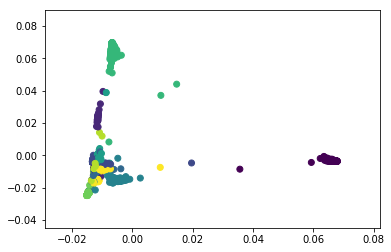

In [70]:
# LLE

# coding:utf-8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

def rbf(dist, t = 1.0):
    '''
    rbf kernel function
    '''
    return np.exp(-(dist/t))

def cal_pairwise_dist(x):

    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def cal_rbf_dist(data, n_neighbors = 10, t = 1):

    dist = cal_pairwise_dist(data)
    n = dist.shape[0]
    rbf_dist = rbf(dist, t)

    W = np.zeros((n, n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1+n_neighbors]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i]

    return W

def le(data,
          n_dims = 2,
          n_neighbors = 5, t = 1.0):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target dim
    :param n_neighbors: k nearest neighbors
    :param t: a param for rbf
    :return:
    '''
    N = data.shape[0]
    W = cal_rbf_dist(data, n_neighbors, t)
    D = np.zeros_like(W)
    for i in range(N):
        D[i,i] = np.sum(W[i])

    D_inv = np.linalg.inv(D)
    L = D - W
    eig_val, eig_vec = np.linalg.eig(np.dot(D_inv, L))

    sort_index_ = np.argsort(eig_val)

    eig_val = eig_val[sort_index_]
    print("eig_val[:10]: ", eig_val[:10])

    j = 0
    while eig_val[j] < 1e-6:
        j+=1

    print("j: ", j)

    sort_index_ = sort_index_[j:j+n_dims]
    eig_val_picked = eig_val[j:j+n_dims]
    print(eig_val_picked)
    eig_vec_picked = eig_vec[:, sort_index_]

    # print("L: ")
    # print(np.dot(np.dot(eig_vec_picked.T, L), eig_vec_picked))
    # print("D: ")
    # D not equal I ???
    print(np.dot(np.dot(eig_vec_picked.T, D), eig_vec_picked))

    X_ndim = eig_vec_picked
    return X_ndim

if __name__ == '__main__':
    # X, Y = make_swiss_roll(n_samples = 2000)
    # X_ndim = le(X, n_neighbors = 5, t = 20)
    #
    # fig = plt.figure(figsize=(12,6))
    # ax1 = fig.add_subplot(121, projection='3d')
    # ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c = Y)
    #
    # ax2 = fig.add_subplot(122)
    # ax2.scatter(X_ndim[:, 0], X_ndim[:, 1], c = Y)
    # plt.show()

    X = load_digits().data
    y = load_digits().target

    dist = cal_pairwise_dist(X)
    max_dist = np.max(dist)
    print("max_dist", max_dist)
    X_ndim = le(X, n_neighbors = 20, t = max_dist*0.1)
    plt.scatter(X_ndim[:, 0], X_ndim[:, 1], c = y)
    plt.show()


max_dist 5935.0
eig_val[:10] [0.         0.         0.         0.00174574 0.00860943 0.01745835
 0.02143826 0.03495575 0.04032973 0.04504305]
j:  3
[0.00174574 0.00860943]


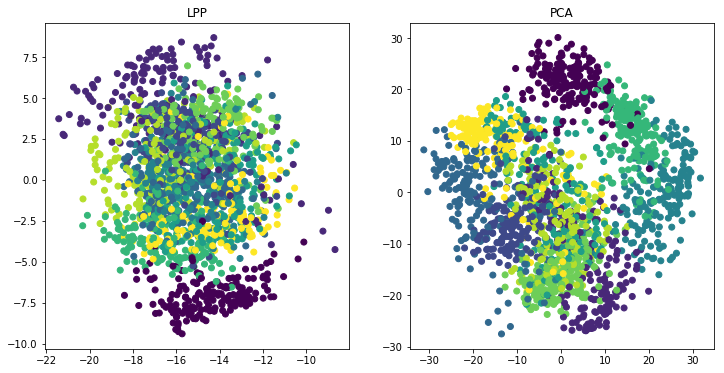

In [71]:
# LPP
# coding:utf-8

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits, load_iris

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def make_swiss_roll(n_samples=100, noise=0.0, random_state=None):
    #Generate a swiss roll dataset.
    t = 1.5 * np.pi * (1 + 2 * np.random.rand(1, n_samples))
    x = t * np.cos(t)
    y = 83 * np.random.rand(1, n_samples)
    z = t * np.sin(t)
    X = np.concatenate((x, y, z))
    X += noise * np.random.randn(3, n_samples)
    X = X.T
    t = np.squeeze(t)
    return X, t

def rbf(dist, t = 1.0):
    '''
    rbf kernel function
    '''
    return np.exp(-(dist/t))

def cal_pairwise_dist(x):

    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def cal_rbf_dist(data, n_neighbors = 10, t = 1):

    dist = cal_pairwise_dist(data)
    n = dist.shape[0]
    rbf_dist = rbf(dist, t)

    W = np.zeros((n, n))
    for i in range(n):
        index_ = np.argsort(dist[i])[1:1 + n_neighbors]
        W[i, index_] = rbf_dist[i, index_]
        W[index_, i] = rbf_dist[index_, i]

    return W

def lpp(data,
        n_dims = 2,
        n_neighbors = 30, t = 1.0):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target dim
    :param n_neighbors: k nearest neighbors
    :param t: a param for rbf
    :return:
    '''
    N = data.shape[0]
    W = cal_rbf_dist(data, n_neighbors, t)
    D = np.zeros_like(W)

    for i in range(N):
        D[i,i] = np.sum(W[i])

    L = D - W
    XDXT = np.dot(np.dot(data.T, D), data)
    XLXT = np.dot(np.dot(data.T, L), data)

    eig_val, eig_vec = np.linalg.eig(np.dot(np.linalg.pinv(XDXT), XLXT))

    sort_index_ = np.argsort(np.abs(eig_val))
    eig_val = eig_val[sort_index_]
    print("eig_val[:10]", eig_val[:10])

    j = 0
    while eig_val[j] < 1e-6:
        j+=1

    print("j: ", j)

    sort_index_ = sort_index_[j:j+n_dims]
    # print(sort_index_)
    eig_val_picked = eig_val[j:j+n_dims]
    print(eig_val_picked)
    eig_vec_picked = eig_vec[:, sort_index_]

    data_ndim = np.dot(data, eig_vec_picked)

    return data_ndim

if __name__ == '__main__':
    X = load_digits().data
    y = load_digits().target
    # X, y = make_swiss_roll(n_samples = 1000)

    dist = cal_pairwise_dist(X)
    max_dist = np.max(dist)
    print("max_dist", max_dist)

    data_2d = lpp(X, n_neighbors = 5, t = 0.01*max_dist)
    data_2 = PCA(n_components=2).fit_transform(X)


    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title("LPP")
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c = y)

    plt.subplot(122)
    plt.title("PCA")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = y)
    plt.show()



C:\anaconda\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


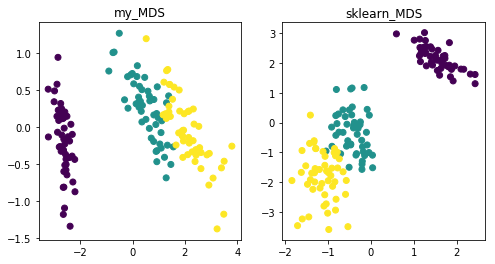

In [72]:
# MDS
# coding:utf-8
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def cal_pairwise_dist(x):
    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist


def my_mds(data, n_dims):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target n_dims
    :return: (n_samples, n_dims)
    '''

    n, d = data.shape
    dist = cal_pairwise_dist(data)
    T1 = np.ones((n,n))*np.sum(dist)/n**2
    T2 = np.sum(dist, axis = 1, keepdims=True)/n
    T3 = np.sum(dist, axis = 0, keepdims=True)/n

    B = -(T1 - T2 - T3 + dist)/2

    eig_val, eig_vector = np.linalg.eig(B)
    index_ = np.argsort(-eig_val)[:n_dims]
    picked_eig_val = eig_val[index_].real
    picked_eig_vector = eig_vector[:, index_]
    # print(picked_eig_vector.shape, picked_eig_val.shape)
    return picked_eig_vector*picked_eig_val**(0.5)

if __name__ == '__main__':
    iris = load_iris()
    data = iris.data
    Y = iris.target
    data_1 = my_mds(data, 2)

    data_2 = MDS(n_components=2).fit_transform(data)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.title("my_MDS")
    plt.scatter(data_1[:, 0], data_1[:, 1], c=Y)

    plt.subplot(122)
    plt.title("sklearn_MDS")
    plt.scatter(data_2[:, 0], data_2[:, 1], c=Y)
    plt.savefig("MDS_1.png")
    plt.show()

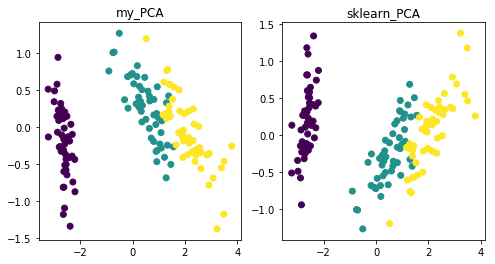

In [73]:
# PCA
# coding:utf-8
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

def pca(data, n_dim):
    '''

    pca is O(D^3)
    :param data: (n_samples, n_features(D))
    :param n_dim: target dimensions
    :return: (n_samples, n_dim)
    '''
    data = data - np.mean(data, axis = 0, keepdims = True)

    cov = np.dot(data.T, data)

    eig_values, eig_vector = np.linalg.eig(cov)
    # print(eig_values)
    indexs_ = np.argsort(-eig_values)[:n_dim]
    picked_eig_values = eig_values[indexs_]
    picked_eig_vector = eig_vector[:, indexs_]
    data_ndim = np.dot(data, picked_eig_vector)
    return data_ndim


# data 降维的矩阵(n_samples, n_features)
# n_dim 目标维度
# fit n_features >> n_samples, reduce cal
def highdim_pca(data, n_dim):
    '''

    when n_features(D) >> n_samples(N), highdim_pca is O(N^3)

    :param data: (n_samples, n_features)
    :param n_dim: target dimensions
    :return: (n_samples, n_dim)
    '''
    N = data.shape[0]
    data = data - np.mean(data, axis = 0, keepdims = True)

    Ncov = np.dot(data, data.T)

    Neig_values, Neig_vector = np.linalg.eig(Ncov)
    indexs_ = np.argsort(-Neig_values)[:n_dim]
    Npicked_eig_values = Neig_values[indexs_]
    # print(Npicked_eig_values)
    Npicked_eig_vector = Neig_vector[:, indexs_]
    # print(Npicked_eig_vector.shape)

    picked_eig_vector = np.dot(data.T, Npicked_eig_vector)
    picked_eig_vector = picked_eig_vector/(N*Npicked_eig_values.reshape(-1, n_dim))**0.5
    # print(picked_eig_vector.shape)

    data_ndim = np.dot(data, picked_eig_vector)
    return data_ndim

if __name__ == "__main__":
    data = load_iris()
    X = data.data
    Y = data.target
    data_2d1 = pca(X, 2)
    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("my_PCA")
    plt.scatter(data_2d1[:, 0], data_2d1[:, 1], c = Y)

    sklearn_pca = PCA(n_components=2)
    data_2d2 = sklearn_pca.fit_transform(X)
    plt.subplot(122)
    plt.title("sklearn_PCA")
    plt.scatter(data_2d2[:, 0], data_2d2[:, 1], c = Y)
    plt.show()

[5.89831214 5.10991178]


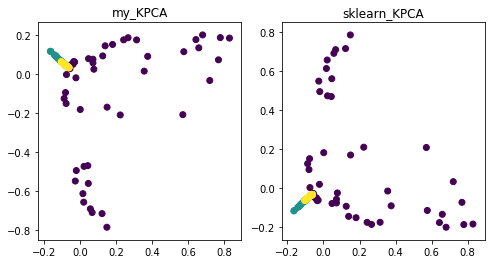

In [74]:
# KPCA
# coding:utf-8
# 实现KPCA

from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''


def sigmoid(x, coef = 0.25):
    x = np.dot(x, x.T)
    return np.tanh(coef*x+1)

def linear(x):
    x = np.dot(x, x.T)
    return x

def rbf(x, gamma = 15):
    sq_dists = pdist(x, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    return np.exp(-gamma*mat_sq_dists)

def kpca(data, n_dims=2, kernel = rbf):
    '''

    :param data: (n_samples, n_features)
    :param n_dims: target n_dims
    :param kernel: kernel functions
    :return: (n_samples, n_dims)
    '''

    K = kernel(data)
    #
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    #
    eig_values, eig_vector = np.linalg.eig(K)
    idx = eig_values.argsort()[::-1]
    eigval = eig_values[idx][:n_dims]
    eigvector = eig_vector[:, idx][:, :n_dims]
    print(eigval)
    eigval = eigval**(1/2)
    vi = eigvector/eigval.reshape(-1,n_dims)
    data_n = np.dot(K, vi)
    return data_n


if __name__ == "__main__":
    data = load_iris().data
    Y = load_iris().target
    data_1 = kpca(data, kernel=rbf)


    sklearn_kpca = KernelPCA(n_components=2, kernel="rbf", gamma=15)
    data_2 = sklearn_kpca.fit_transform(data)

    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("my_KPCA")
    plt.scatter(data_1[:, 0], data_1[:, 1], c = Y)

    plt.subplot(122)
    plt.title("sklearn_KPCA")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = Y)
    plt.show()


In [75]:
# SVD
# coding:utf-8

'''
author: heucoder
email: 812860165@qq.com
date: 2019.6.13
'''

import numpy as np
from sklearn.datasets import load_iris

def svd(data):
    '''
    :param data:
    :return: U, Sigma, VT
    '''

    # mean
    N, D = data.shape
    data = data - np.mean(data, axis=0)

    # V
    Veig_val, Veig_vector = np.linalg.eigh(np.dot(data.T, data))
    VT = Veig_vector[:, np.argsort(-abs(Veig_val))].T

    # U
    Ueig_val, Ueig_vector = np.linalg.eigh(np.dot(data, data.T))
    U = Ueig_vector[:, np.argsort(-abs(Ueig_val))]

    # Sigma
    Sigma = np.zeros((N, D))
    for i in range(D):
        Sigma[i, i] = np.dot(data, VT[i])[i]/U[i,i]

    return U, Sigma, VT

if __name__ == '__main__':
    iris = load_iris()
    X = iris.data
    Y = iris.target
    U, Sigma, VT = svd(X)
    print(U)
    print(Sigma)
    print(VT)

[[-0.10693744  0.05311648  0.00817734 ...  0.          0.
   0.        ]
 [-0.10813331 -0.0294357   0.06165318 ...  0.0029271  -0.00252795
  -0.0016385 ]
 [-0.11509941 -0.02410542 -0.00524368 ... -0.0056412  -0.01324613
   0.00708548]
 ...
 [ 0.07029277  0.01311441 -0.03822315 ... -0.0004721   0.03860121
   0.05283378]
 [ 0.07573485  0.01939549 -0.21186855 ...  0.00684687  0.00086972
   0.00056279]
 [ 0.0553861  -0.04700715 -0.10631037 ... -0.03173913  0.03879984
  -0.03537056]]
[[-25.09996044   0.           0.           0.        ]
 [  0.           6.01314738   0.           0.        ]
 [  0.           0.           3.41368064   0.        ]
 [  0.           0.           0.          -1.88452351]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.  

Computing pairwise distances...
Computing pair_prob for point 0 of 1797 ...
Computing pair_prob for point 500 of 1797 ...
Computing pair_prob for point 1000 of 1797 ...
Computing pair_prob for point 1500 of 1797 ...
Mean value of sigma:  11.698543429042957
T-SNE DURING:144.5386861040257
Iteration  100 : error is  12.950720914310525
Iteration  200 : error is  0.8713499274976352
ratio  0.06728196316351741
Iteration  300 : error is  0.750249605709917
ratio  0.8610198750627119
Iteration  400 : error is  0.7122411072878407
ratio  0.9493388625161475
Iteration  500 : error is  0.69501288801438
ratio  0.9758112539459223
finished training!


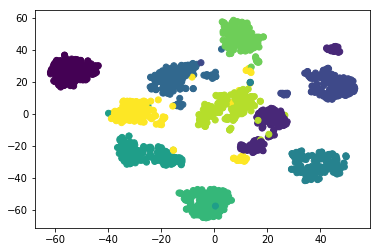

In [76]:
# T-SNE
# coding:utf-8

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import time

def cal_pairwise_dist(x):
    '''计算pairwise 距离, x是matrix
    (a-b)^2 = a^2 + b^2 - 2*a*b
    '''
    sum_x = np.sum(np.square(x), 1)
    dist = np.add(np.add(-2 * np.dot(x, x.T), sum_x).T, sum_x)
    #返回任意两个点之间距离的平方
    return dist

def cal_perplexity(dist, idx=0, beta=1.0):
    '''计算perplexity, D是距离向量，
    idx指dist中自己与自己距离的位置，beta是高斯分布参数
    这里的perp仅计算了熵，方便计算
    '''
    prob = np.exp(-dist * beta)
    # 设置自身prob为0
    prob[idx] = 0
    sum_prob = np.sum(prob)
    if sum_prob < 1e-12:
        prob = np.maximum(prob, 1e-12)
        perp = -12
    else:
        perp = np.log(sum_prob) + beta * np.sum(dist * prob) / sum_prob
        prob /= sum_prob

    return perp, prob

def seach_prob(x, tol=1e-5, perplexity=30.0):
    '''二分搜索寻找beta,并计算pairwise的prob
    '''

    # 初始化参数
    print("Computing pairwise distances...")
    (n, d) = x.shape
    dist = cal_pairwise_dist(x)
    pair_prob = np.zeros((n, n))
    beta = np.ones((n, 1))
    # 取log，方便后续计算
    base_perp = np.log(perplexity)

    for i in range(n):
        if i % 500 == 0:
            print("Computing pair_prob for point %s of %s ..." %(i,n))

        betamin = -np.inf
        betamax = np.inf
        perp, this_prob = cal_perplexity(dist[i], i, beta[i])

        # 二分搜索,寻找最佳sigma下的prob
        perp_diff = perp - base_perp
        tries = 0
        while np.abs(perp_diff) > tol and tries < 50:
            if perp_diff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2
                else:
                    beta[i] = (beta[i] + betamax) / 2
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2
                else:
                    beta[i] = (beta[i] + betamin) / 2

            # 更新perb,prob值
            perp, this_prob = cal_perplexity(dist[i], i, beta[i])
            perp_diff = perp - base_perp
            tries = tries + 1
        # 记录prob值
        pair_prob[i,] = this_prob
    print("Mean value of sigma: ", np.mean(np.sqrt(1 / beta)))
    #每个点对其他点的条件概率分布pi\j
    return pair_prob

def tsne(x, no_dims=2, perplexity=30.0, max_iter=1000):
    """Runs t-SNE on the dataset in the NxD array x
    to reduce its dimensionality to no_dims dimensions.
    The syntaxis of the function is Y = tsne.tsne(x, no_dims, perplexity),
    where x is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array x should have type float.")
        return -1

    (n, d) = x.shape

    # 动量
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    # 随机初始化Y
    y = np.random.randn(n, no_dims)
    # dy梯度
    dy = np.zeros((n, no_dims))
    # iy是什么
    iy = np.zeros((n, no_dims))

    gains = np.ones((n, no_dims))

    # 对称化
    P = seach_prob(x, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)   #pij
    # early exaggeration
    # pi\j，提前夸大
    print ("T-SNE DURING:%s" % time.clock())
    P = P * 4
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):
        # Compute pairwise affinities
        sum_y = np.sum(np.square(y), 1)
        num = 1 / (1 + np.add(np.add(-2 * np.dot(y, y.T), sum_y).T, sum_y))
        num[range(n), range(n)] = 0
        Q = num / np.sum(num)   #qij
        Q = np.maximum(Q, 1e-12)    #X与Y逐位比较取其大者

        # Compute gradient
        # np.tile(A,N) 重复数组AN次 [1],5 [1,1,1,1,1]
        # pij-qij
        PQ = P - Q
        # 梯度dy
        for i in range(n):
            dy[i,:] = np.sum(np.tile(PQ[:,i] * num[:,i], (no_dims, 1)).T * (y[i,:] - y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum

        gains = (gains + 0.2) * ((dy > 0) != (iy > 0)) + (gains * 0.8) * ((dy > 0) == (iy > 0))
        gains[gains < min_gain] = min_gain
        # 迭代
        iy = momentum * iy - eta * (gains * dy)
        y = y + iy
        y = y - np.tile(np.mean(y, 0), (n, 1))
        # Compute current value of cost function\
        if (iter + 1) % 100 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration ", (iter + 1), ": error is ", C)
            if (iter+1) != 100:
                ratio = C/oldC
                print("ratio ", ratio)
                if ratio >= 0.95:
                    break
            oldC = C
        # Stop lying about P-values
        if iter == 100:
            P = P / 4
    print("finished training!")
    return y

if __name__ == "__main__":
    digits = load_digits()
    X = digits.data
    Y = digits.target

    data_2d = tsne(X, 2)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c = Y)
    plt.show()


# 组合使用

# FeatureUnion与pipeline的区别
* pipeline相当于feature串行处理，后一个transformer处理前一个transformer的feature结果；

* featureunion相当于feature的并行处理，将所有transformer的处理结果拼接成大的feature vector。


## FeatureUnion与pipeline的结合使用

In [77]:
# Author: Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 clause

from sklearn.pipeline import Pipeline, FeatureUnion

# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.datasets import load_iris

from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest


iris = load_iris()

X, y = iris.data, iris.target

# This dataset is way to high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)


svm = SVC(kernel="linear")


# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

#这个可以研究一下子
param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

#这个的作用是啥
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)

grid_search.fit(X, y)

print(grid_search.best_estimator_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.867, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1 
[CV]  features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=1, fea

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=1 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=1, score=1.000, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.967, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.967, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.933, total=   0.0s
[CV] features__pca__n_components=1, features__univ_select__k=2, svm__C=10 
[CV]  features__pca__n_components=1, features__univ_select__k=2, svm__C=10, score=0.933, total=   0.0s
[CV] featu

[CV]  features__pca__n_components=3, features__univ_select__k=1, svm__C=10, score=1.000, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1, score=0.967, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1, score=1.000, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1, score=0.933, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1, score=0.967, total=   0.0s
[CV] features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1 
[CV]  features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1, score=1.000, total=   0.

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.6s finished


# 模型保存

In [78]:
# 保存与加载
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import joblib
x,y=load_iris(return_X_y=True)
clf=SVC().fit(x,y)
print(clf.score(x,y))
#保存
joblib.dump(clf,'svc.pkl')
clf2=joblib.load('svc.pkl')
print(clf2.score(x,y))

0.9733333333333334
0.9733333333333334
